In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.simplefilter(action='ignore', category=Warning)


In [3]:
import pandas as pd

# Load the data
data = pd.read_csv('test_data.csv')

# Display the first few rows of the dataset
data.head()



,SiteId,MedianLengthOnStudy,MedianPatientAge,PatientsScreened,Country,PatientsEnrolled,CompletedVisits,ManualQueries,DataEntry,AdverseEvents,SeriousAdverseEvents
0,CA-2,42,18.66,27,Canada,11,42,758,3.5,15,15
1,US-3,37,77.69,2,USA,1,33,614,5.0,8,8
2,UK-4,43,49.24,6,UK,6,232,763,4.0,108,17
3,US-6,9,64.74,16,USA,10,81,1180,3.5,21,10
4,JP-7,16,72.41,13,Japan,4,243,778,0.5,9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SiteId                756 non-null    object 
 1   MedianLengthOnStudy   756 non-null    int64  
 2   MedianPatientAge      756 non-null    float64
 3   PatientsScreened      756 non-null    int64  
 4   Country               756 non-null    object 
 5   PatientsEnrolled      756 non-null    int64  
 6   CompletedVisits       756 non-null    int64  
 7   ManualQueries         756 non-null    int64  
 8   DataEntry             756 non-null    float64
 9   AdverseEvents         756 non-null    int64  
 10  SeriousAdverseEvents  756 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 65.1+ KB


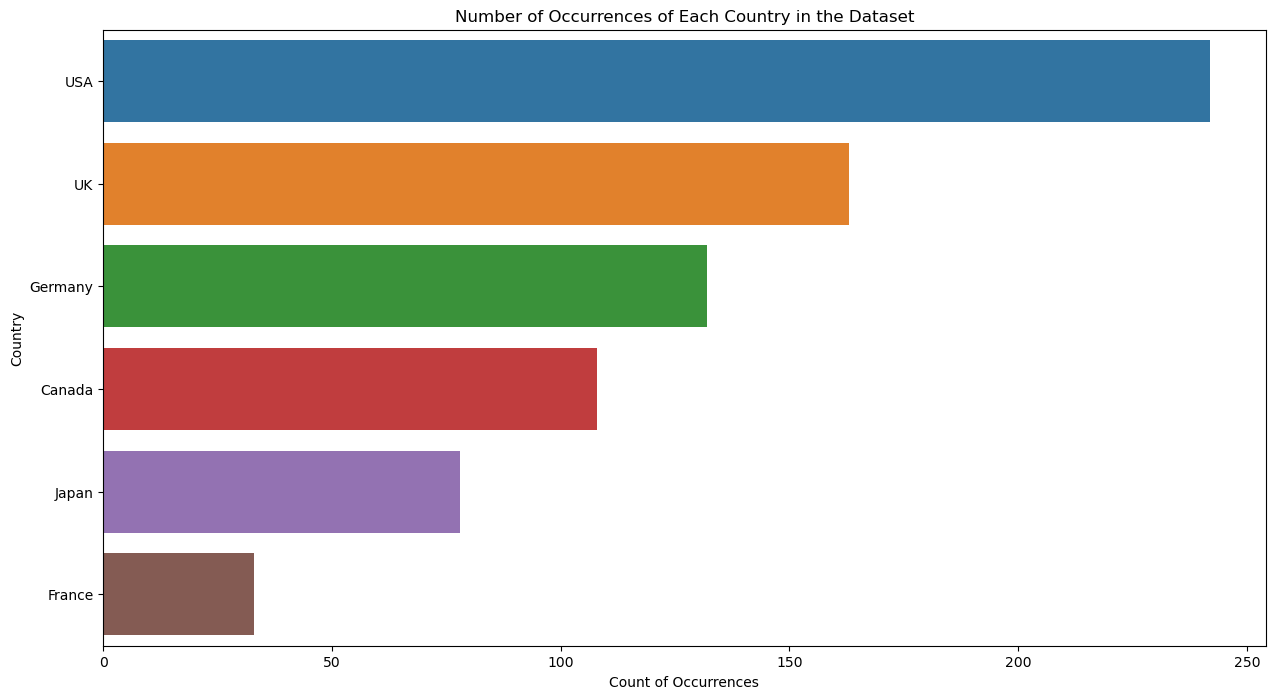

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size for the plot
plt.figure(figsize=(15, 8))

# Create a count plot to visualize the occurrences of each 'Country' in the dataset
# The 'order' parameter orders the countries based on their count
sns.countplot(data=data, y='Country', order=data['Country'].value_counts().index)

# Set the title of the plot to accurately describe the visualized data
plt.title('Number of Occurrences of Each Country in the Dataset')

# Labeling the y-axis as 'Country'
plt.ylabel('Country')

# Labeling the x-axis to reflect that it represents counts of occurrences
plt.xlabel('Count of Occurrences')

# Display the plot
plt.show()


In [6]:
# Basic statistical summary of the dataset
summary = data.describe()
summary

,MedianLengthOnStudy,MedianPatientAge,PatientsScreened,PatientsEnrolled,CompletedVisits,ManualQueries,DataEntry,AdverseEvents,SeriousAdverseEvents
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,24.646825,63.611177,26.582011,14.600529,448.726190,769.699735,7.055556,96.392857,41.708995
std,13.288879,15.589939,25.421739,14.275035,895.357748,300.103684,9.351040,168.264394,79.462682
min,1.000000,1.310000,1.000000,1.000000,0.000000,28.000000,0.500000,-17.000000,-2.000000
25%,13.000000,54.477500,9.000000,4.000000,23.000000,628.750000,0.500000,14.000000,4.000000
50%,25.000000,65.550000,19.000000,10.000000,115.000000,762.000000,3.000000,42.500000,15.000000
75%,36.000000,74.270000,36.000000,20.000000,484.500000,890.500000,9.500000,110.000000,45.250000
max,48.000000,90.000000,221.000000,108.000000,9000.000000,2210.000000,48.000000,1890.000000,1110.000000


there are no missing values in the dataset.
MedianLengthOnStudy ranges from 1 to 48, with a mean of approximately 24.65.
MedianPatientAge has a mean of approximately 63.61 years.
PatientsScreened, PatientsEnrolled, and other columns have varying distributions, as indicated by their mean, minimum, and maximum values.


In [7]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values


SiteId                  0
MedianLengthOnStudy     0
MedianPatientAge        0
PatientsScreened        0
Country                 0
PatientsEnrolled        0
CompletedVisits         0
ManualQueries           0
DataEntry               0
AdverseEvents           0
SeriousAdverseEvents    0
dtype: int64

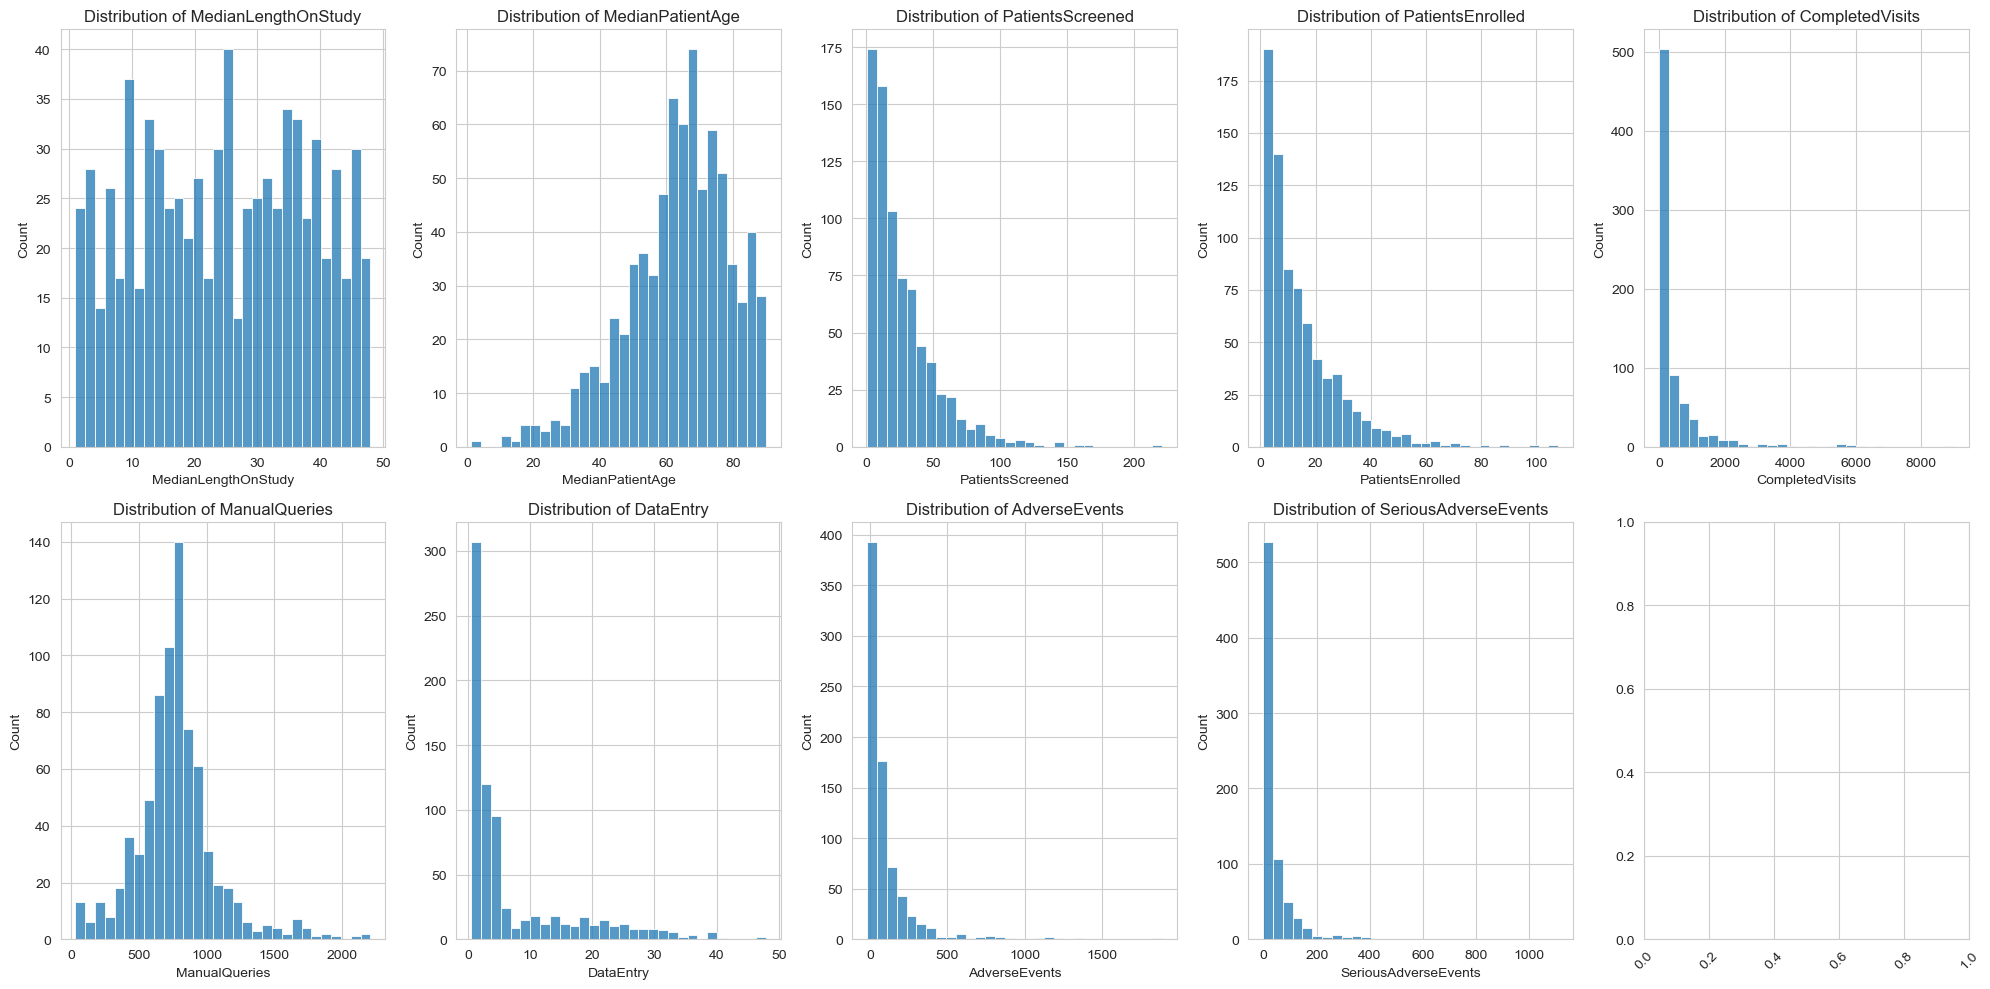

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Prepare a list of numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

# Plotting distributions for numerical columns
for ax, col in zip(axes, numeric_cols):
    sns.histplot(data[col], bins=30, ax=ax, kde=False)
    ax.set_title(f'Distribution of {col}')
    ax.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation on x-axis
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



variables like AdverseEvents and SeriousAdverseEvents have right-skewed distributions, indicating the presence of outliers 
There are negative values in AdverseEvents and SeriousAdverseEvents which likely need correction since they are count variables.

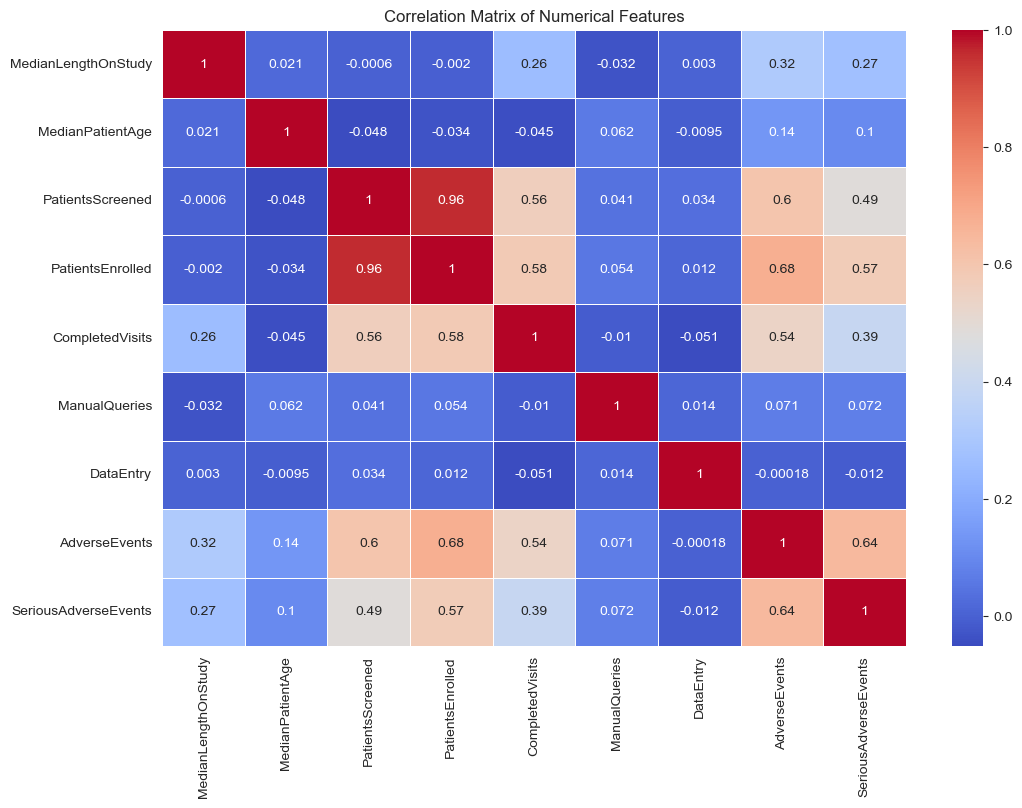

In [9]:
# Correlation Matrix
correlation_matrix = data[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Summary of the EDA findings
eda_summary = {
    "numeric_cols": numeric_cols,
    "categorical_cols": categorical_cols,
    "correlation_matrix": correlation_matrix
}


there are negative values in AdverseEvents and SeriousAdverseEvents, which could be data entry errors as negative values for these metrics don't make  sense i,e you cant have a bnegtaive adverse event in a clicnical trial data , 

The pair Patients_Enrolled and Patients_Screened is highly correlated. This makes sense as sites that screen more patients are likely to enroll more of them.

To avoid multicollinearity in our model, it's advisable to drop one of these features. For this purposes, I will retain PatientsEnrolled and drop PatientsScreened

Country are the categorical variables and will require encoding for model training while site_ID has 756 unique variable and will likely not cpntribute anything to the model and will be dropped.

Negative values in adverse_events and serious_advserse_evensts were replaced with their respective median values.

In [10]:
import numpy as np

# Data Cleaning: Replace negative values with median values
for col in ["AdverseEvents", "SeriousAdverseEvents"]:
    median_val = data[col][data[col] >= 0].median()
    data[col] = np.where(data[col] < 0, median_val, data[col])

# Drop 'PatientsScreened' column
data_cleaned = data.drop(columns=["PatientsScreened"])



In [11]:
# Feature Engineering: Create new features
data_cleaned["AdverseEventsPerPatient"] = data_cleaned["AdverseEvents"] / data_cleaned["PatientsEnrolled"]
data_cleaned["AdverseEventsPerVisit"] = data_cleaned["AdverseEvents"] / data_cleaned["CompletedVisits"]


#After creating new features, infinite values (created due to division by zero) were replaced with NaN and
#then filled with the median of the respective columns.

# Handling Infinite Values: Replace inf with NaN and then fill NaN with median of the column
data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
data_cleaned.fillna(data_cleaned.median(), inplace=True)

data_cleaned

,SiteId,MedianLengthOnStudy,MedianPatientAge,Country,PatientsEnrolled,CompletedVisits,ManualQueries,DataEntry,AdverseEvents,SeriousAdverseEvents,AdverseEventsPerPatient,AdverseEventsPerVisit
0,CA-2,42,18.66,Canada,11,42,758,3.5,15.0,15.0,1.363636,0.357143
1,US-3,37,77.69,USA,1,33,614,5.0,8.0,8.0,8.000000,0.242424
2,UK-4,43,49.24,UK,6,232,763,4.0,108.0,17.0,18.000000,0.465517
3,US-6,9,64.74,USA,10,81,1180,3.5,21.0,10.0,2.100000,0.259259
4,JP-7,16,72.41,Japan,4,243,778,0.5,9.0,6.0,2.250000,0.037037
...,...,...,...,...,...,...,...,...,...,...,...,...
751,CA-996,41,48.27,Canada,3,117,704,0.5,10.0,15.0,3.333333,0.085470
752,US-997,22,64.83,USA,7,293,770,0.5,50.0,0.0,7.142857,0.170648
753,DL-998,12,74.38,Germany,3,23,1630,23.5,7.0,3.0,2.333333,0.304348
754,UK-999,19,57.45,UK,1,2,762,3.5,2.0,1.0,2.000000,1.000000


Log Transformation: Applied to PatientsEnrolled, CompletedVisits, DataEntry, AdverseEvents, SeriousAdverseEvents, AdverseEventsPerPatient, and AdverseEventsPerVisit to handle skewness.

In [12]:
# Log Transformation: Apply log(x + 1) transformation to handle zero values and reduce skewness
cols_to_transform = ["PatientsEnrolled", "CompletedVisits", "DataEntry", "AdverseEvents", "SeriousAdverseEvents",
                     "AdverseEventsPerPatient", "AdverseEventsPerVisit"]
data_cleaned[cols_to_transform] = np.log1p(data_cleaned[cols_to_transform])

# Verify the data cleaning and feature engineering
data_cleaned.head()


,SiteId,MedianLengthOnStudy,MedianPatientAge,Country,PatientsEnrolled,CompletedVisits,ManualQueries,DataEntry,AdverseEvents,SeriousAdverseEvents,AdverseEventsPerPatient,AdverseEventsPerVisit
0,CA-2,42,18.66,Canada,2.484907,3.761200,758,1.504077,2.772589,2.772589,0.860201,0.305382
1,US-3,37,77.69,USA,0.693147,3.526361,614,1.791759,2.197225,2.197225,2.197225,0.217065
2,UK-4,43,49.24,UK,1.945910,5.451038,763,1.609438,4.691348,2.890372,2.944439,0.382208
3,US-6,9,64.74,USA,2.397895,4.406719,1180,1.504077,3.091042,2.397895,1.131402,0.230524
4,JP-7,16,72.41,Japan,1.609438,5.497168,778,0.405465,2.302585,1.945910,1.178655,0.036368


CHECK THE DISTRIBUTION AFTER CLEANING

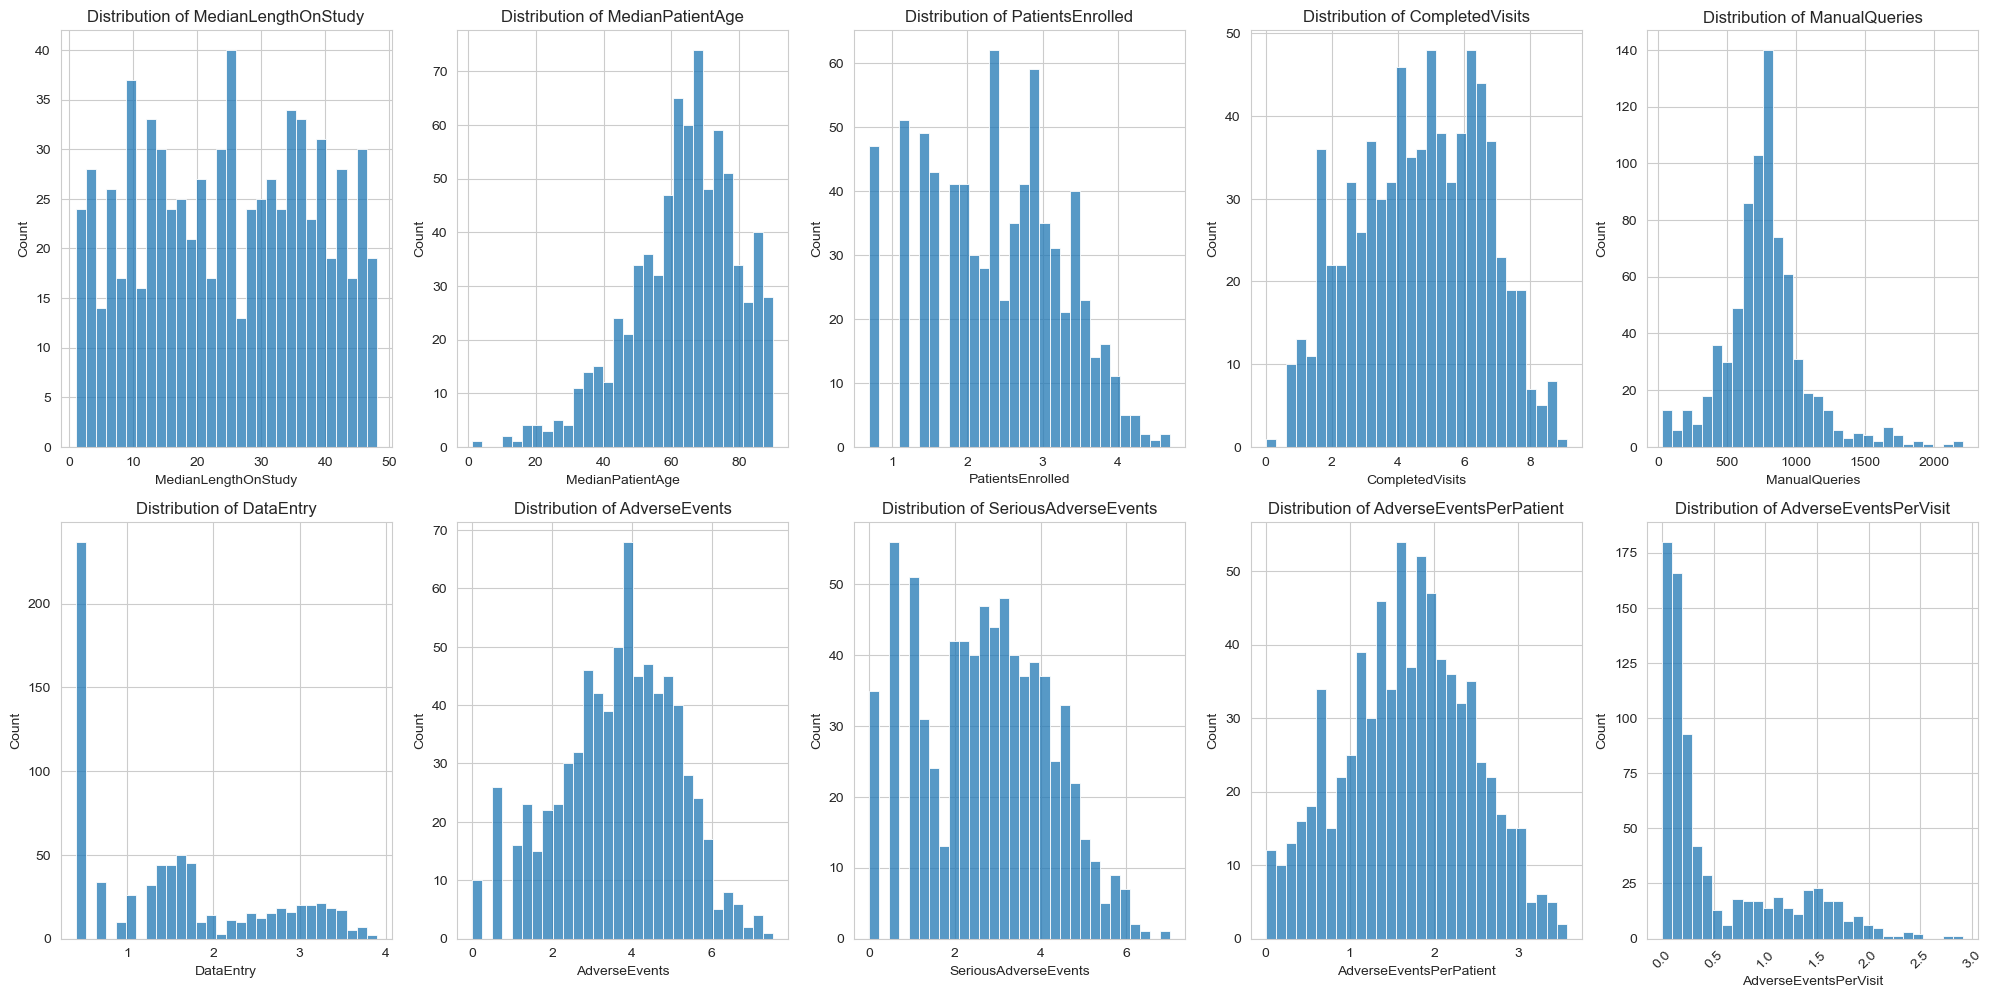

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Prepare a list of numeric and categorical columns
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

# Plotting distributions for numerical columns
for ax, col in zip(axes, numeric_cols):
    sns.histplot(data_cleaned[col], bins=30, ax=ax, kde=False)
    ax.set_title(f'Distribution of {col}')
    ax.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation on x-axis
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [14]:
# Recategorizing based on Propositions 2 and 3 for AdverseEvents

# Recalculate quartiles for AdverseEvents
q1_adverse = data_cleaned["AdverseEvents"].quantile(0.25)
median_adverse = data_cleaned["AdverseEvents"].quantile(0.5)
q3_adverse = data_cleaned["AdverseEvents"].quantile(0.75)

# Vectorized operations for categorization using Proposition 2 for AdverseEvents
conditions_p2_adverse = [
    data_cleaned['AdverseEvents'] > q3_adverse,
    (data_cleaned['AdverseEvents'] <= q3_adverse) & (data_cleaned['AdverseEvents'] > median_adverse)
]
choices_p2_adverse = ["Red", "Amber"]
data_cleaned['RiskCategory_P2_Adverse'] = np.select(conditions_p2_adverse, choices_p2_adverse, default="Green")

# Vectorized operations for categorization using Proposition 3 for AdverseEvents
conditions_p3_adverse = [
    data_cleaned['AdverseEvents'] > q3_adverse,
    (data_cleaned['AdverseEvents'] <= q3_adverse) & (data_cleaned['AdverseEvents'] > q1_adverse)
]
choices_p3_adverse = ["Red", "Amber"]
data_cleaned['RiskCategory_P3_Adverse'] = np.select(conditions_p3_adverse, choices_p3_adverse, default="Green")

# Get the distribution for Proposition 2 and 3 for AdverseEvents
risk_distributions_adverse = {
    'P2_Adverse': data_cleaned['RiskCategory_P2_Adverse'].value_counts(),
    'P3_Adverse': data_cleaned['RiskCategory_P3_Adverse'].value_counts()
}

# Display the created categories and their distributions
risk_distributions_adverse


{'P2_Adverse': Green    381
 Amber    188
 Red      187
 Name: RiskCategory_P2_Adverse, dtype: int64,
 'P3_Adverse': Amber    372
 Green    197
 Red      187
 Name: RiskCategory_P3_Adverse, dtype: int64}

BASED ON THE MODEL i created two new risk categories have been created

RiskCategory_P2_Adverse:
Red: 187 instances
Amber: 188 instances
Green: 381 instances
    
RiskCategory_P3_Adverse:
Red: 187 instances
Amber: 372 instances
Green: 197 instances

In [15]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SiteId                   756 non-null    object 
 1   MedianLengthOnStudy      756 non-null    int64  
 2   MedianPatientAge         756 non-null    float64
 3   Country                  756 non-null    object 
 4   PatientsEnrolled         756 non-null    float64
 5   CompletedVisits          756 non-null    float64
 6   ManualQueries            756 non-null    int64  
 7   DataEntry                756 non-null    float64
 8   AdverseEvents            756 non-null    float64
 9   SeriousAdverseEvents     756 non-null    float64
 10  AdverseEventsPerPatient  756 non-null    float64
 11  AdverseEventsPerVisit    756 non-null    float64
 12  RiskCategory_P2_Adverse  756 non-null    object 
 13  RiskCategory_P3_Adverse  756 non-null    object 
dtypes: float64(8), int64(2), o

siteid seems to be an identifier and has 756 unique have and is likely to contribite nothing to the model so will be removed

In [16]:
data_cleaned.SiteId.unique

<bound method Series.unique of 0         CA-2
1         US-3
2         UK-4
3         US-6
4         JP-7
        ...   
751     CA-996
752     US-997
753     DL-998
754     UK-999
755    FR-1000
Name: SiteId, Length: 756, dtype: object>

In [17]:
# Drop 'SiteId' column
data_cleaned = data_cleaned.drop(columns=["SiteId"])

# Verify the column has been dropped
data_cleaned.head()


,MedianLengthOnStudy,MedianPatientAge,Country,PatientsEnrolled,CompletedVisits,ManualQueries,DataEntry,AdverseEvents,SeriousAdverseEvents,AdverseEventsPerPatient,AdverseEventsPerVisit,RiskCategory_P2_Adverse,RiskCategory_P3_Adverse
0,42,18.66,Canada,2.484907,3.761200,758,1.504077,2.772589,2.772589,0.860201,0.305382,Green,Amber
1,37,77.69,USA,0.693147,3.526361,614,1.791759,2.197225,2.197225,2.197225,0.217065,Green,Green
2,43,49.24,UK,1.945910,5.451038,763,1.609438,4.691348,2.890372,2.944439,0.382208,Amber,Amber
3,9,64.74,USA,2.397895,4.406719,1180,1.504077,3.091042,2.397895,1.131402,0.230524,Green,Amber
4,16,72.41,Japan,1.609438,5.497168,778,0.405465,2.302585,1.945910,1.178655,0.036368,Green,Green


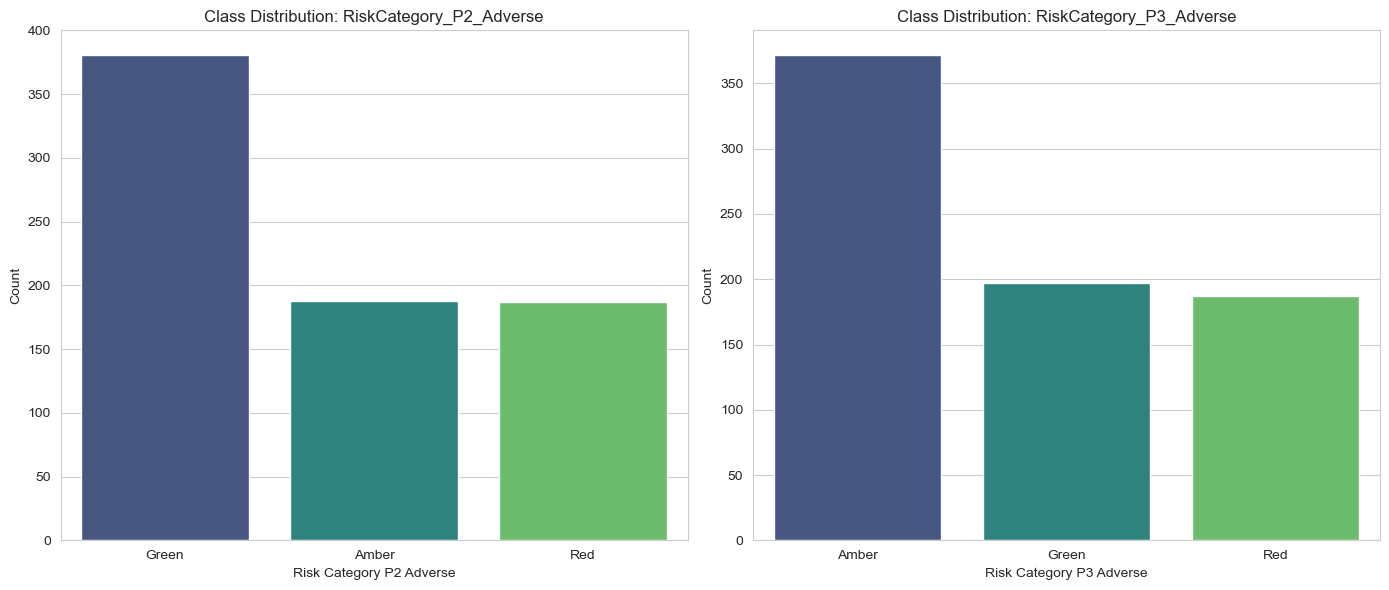

In [18]:
# Visualizing class distributions for 'RiskCategory_P2_Adverse' and 'RiskCategory_P3_Adverse'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the class distributions
sns.countplot(x='RiskCategory_P2_Adverse', data=data_cleaned, ax=axes[0], palette="viridis")
axes[0].set_title('Class Distribution: RiskCategory_P2_Adverse')
axes[0].set_xlabel('Risk Category P2 Adverse')
axes[0].set_ylabel('Count')

sns.countplot(x='RiskCategory_P3_Adverse', data=data_cleaned, ax=axes[1], palette="viridis")
axes[1].set_title('Class Distribution: RiskCategory_P3_Adverse')
axes[1].set_xlabel('Risk Category P3 Adverse')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Encode categorical variables encode the country column using one hot encoding

In [19]:
# One-Hot Encoding for 'Country' column
data_encoded = pd.get_dummies(data_cleaned, columns=['Country'], prefix='Country', drop_first=True)

# Verify the encoding
data_encoded.head()


,MedianLengthOnStudy,MedianPatientAge,PatientsEnrolled,CompletedVisits,ManualQueries,DataEntry,AdverseEvents,SeriousAdverseEvents,AdverseEventsPerPatient,AdverseEventsPerVisit,RiskCategory_P2_Adverse,RiskCategory_P3_Adverse,Country_France,Country_Germany,Country_Japan,Country_UK,Country_USA
0,42,18.66,2.484907,3.761200,758,1.504077,2.772589,2.772589,0.860201,0.305382,Green,Amber,0,0,0,0,0
1,37,77.69,0.693147,3.526361,614,1.791759,2.197225,2.197225,2.197225,0.217065,Green,Green,0,0,0,0,1
2,43,49.24,1.945910,5.451038,763,1.609438,4.691348,2.890372,2.944439,0.382208,Amber,Amber,0,0,0,1,0
3,9,64.74,2.397895,4.406719,1180,1.504077,3.091042,2.397895,1.131402,0.230524,Green,Amber,0,0,0,0,1
4,16,72.41,1.609438,5.497168,778,0.405465,2.302585,1.945910,1.178655,0.036368,Green,Green,0,0,1,0,0


In [20]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MedianLengthOnStudy      756 non-null    int64  
 1   MedianPatientAge         756 non-null    float64
 2   PatientsEnrolled         756 non-null    float64
 3   CompletedVisits          756 non-null    float64
 4   ManualQueries            756 non-null    int64  
 5   DataEntry                756 non-null    float64
 6   AdverseEvents            756 non-null    float64
 7   SeriousAdverseEvents     756 non-null    float64
 8   AdverseEventsPerPatient  756 non-null    float64
 9   AdverseEventsPerVisit    756 non-null    float64
 10  RiskCategory_P2_Adverse  756 non-null    object 
 11  RiskCategory_P3_Adverse  756 non-null    object 
 12  Country_France           756 non-null    uint8  
 13  Country_Germany          756 non-null    uint8  
 14  Country_Japan            7

To address class imbalance, I will compute class weights for both RiskCategory_P2_Adverse and RiskCategory_P3_Adverse

In [21]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for 'RiskCategory_P2_Adverse'
class_weights_P2_Adverse = compute_class_weight(
    'balanced',
    classes=data_encoded['RiskCategory_P2_Adverse'].unique(),
    y=data_encoded['RiskCategory_P2_Adverse']
)

# Calculate class weights for 'RiskCategory_P3_Adverse'
class_weights_P3_Adverse = compute_class_weight(
    'balanced',
    classes=data_encoded['RiskCategory_P3_Adverse'].unique(),
    y=data_encoded['RiskCategory_P3_Adverse']
)

# Create a dictionary for easier usage in model training
class_weight_dict_P2_Adverse = {
    class_label: weight 
    for class_label, weight in zip(data_encoded['RiskCategory_P2_Adverse'].unique(), class_weights_P2_Adverse)
}

class_weight_dict_P3_Adverse = {
    class_label: weight 
    for class_label, weight in zip(data_encoded['RiskCategory_P3_Adverse'].unique(), class_weights_P3_Adverse)
}

(class_weight_dict_P2_Adverse, class_weight_dict_P3_Adverse)


({'Green': 0.6614173228346457,
  'Amber': 1.3404255319148937,
  'Red': 1.3475935828877006},
 {'Amber': 0.6774193548387096,
  'Green': 1.2791878172588833,
  'Red': 1.3475935828877006})

In [22]:
##These weights can be utilized during model training to manage the class imbalance by 
#assigning more importance to the minority class.

In [23]:
# scaling numerical variables using min-max scaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Extracting numerical columns to scale
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove the target columns from the list
numerical_cols = [col for col in numerical_cols if col not in ['RiskCategory_P2_Adverse', 'RiskCategory_P3_Adverse']]

# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Verify the scaling
data_encoded.head()


,MedianLengthOnStudy,MedianPatientAge,PatientsEnrolled,CompletedVisits,ManualQueries,DataEntry,AdverseEvents,SeriousAdverseEvents,AdverseEventsPerPatient,AdverseEventsPerVisit,RiskCategory_P2_Adverse,RiskCategory_P3_Adverse,Country_France,Country_Germany,Country_Japan,Country_UK,Country_USA
0,0.872340,0.195625,0.448141,0.413088,0.334555,0.315118,0.367480,0.395349,0.240668,0.104663,Green,Amber,0,0,0,0,0
1,0.765957,0.861202,0.000000,0.387295,0.268561,0.397634,0.291221,0.313307,0.614743,0.074394,Green,Green,0,0,0,0,1
2,0.893617,0.540422,0.313332,0.598680,0.336847,0.345339,0.621794,0.412144,0.823800,0.130993,Amber,Amber,0,0,0,1,0
3,0.170213,0.715188,0.426379,0.483984,0.527956,0.315118,0.409688,0.341921,0.316545,0.079007,Green,Amber,0,0,0,0,1
4,0.319149,0.801669,0.229176,0.603747,0.343721,0.000000,0.305186,0.277471,0.329766,0.012464,Green,Green,0,0,1,0,0


split data into train and test for both target variables

In [25]:
from sklearn.model_selection import train_test_split

# Features and Labels
X = data_encoded.drop(columns=['RiskCategory_P2_Adverse', 'RiskCategory_P3_Adverse'])
y_P2 = data_encoded['RiskCategory_P2_Adverse']
y_P3 = data_encoded['RiskCategory_P3_Adverse']

# Splitting the data for RiskCategory_P2_Adverse
X_train_P2, X_test_P2, y_train_P2, y_test_P2 = train_test_split(
    X, y_P2, test_size=0.2, random_state=42, stratify=y_P2
)

# Splitting the data for RiskCategory_P3_Adverse
X_train_P3, X_test_P3, y_train_P3, y_test_P3 = train_test_split(
    X, y_P3, test_size=0.2, random_state=42, stratify=y_P3
)

# Verify the splits
(X_train_P2.shape, X_test_P2.shape, y_train_P2.shape, y_test_P2.shape,
 X_train_P3.shape, X_test_P3.shape, y_train_P3.shape, y_test_P3.shape)


((604, 15), (152, 15), (604,), (152,), (604, 15), (152, 15), (604,), (152,))

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier(),
    'Gradient Boosted Trees': GradientBoostingClassifier(),
    'Support Vector Machines': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        predictions = model.predict(X_test)
        
        # Calculate performance metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='macro')
        recall = recall_score(y_test, predictions, average='macro')
        f1 = f1_score(y_test, predictions, average='macro')
        
        # Store results
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }
    return results

# Evaluate models for both targets
results_P2 = train_and_evaluate(models, X_train_P2, y_train_P2, X_test_P2, y_test_P2)
results_P3 = train_and_evaluate(models, X_train_P3, y_train_P3, X_test_P3, y_test_P3)

results_P2, results_P3


({'Logistic Regression': {'Accuracy': 0.9013157894736842,
   'Precision': 0.8845332003226741,
   'Recall': 0.8854815170604645,
   'F1-Score': 0.8849062049062049},
  'Decision Trees': {'Accuracy': 1.0,
   'Precision': 1.0,
   'Recall': 1.0,
   'F1-Score': 1.0},
  'Random Forests': {'Accuracy': 1.0,
   'Precision': 1.0,
   'Recall': 1.0,
   'F1-Score': 1.0},
  'Gradient Boosted Trees': {'Accuracy': 1.0,
   'Precision': 1.0,
   'Recall': 1.0,
   'F1-Score': 1.0},
  'Support Vector Machines': {'Accuracy': 0.868421052631579,
   'Precision': 0.8629761904761905,
   'Recall': 0.8628881786776524,
   'F1-Score': 0.8558208527152625},
  'K-Nearest Neighbors': {'Accuracy': 0.756578947368421,
   'Precision': 0.7428065134099616,
   'Recall': 0.721228747544537,
   'F1-Score': 0.7256963762471719}},
 {'Logistic Regression': {'Accuracy': 0.9605263157894737,
   'Precision': 0.9753086419753086,
   'Recall': 0.9472972972972973,
   'F1-Score': 0.9595848595848594},
  'Decision Trees': {'Accuracy': 1.0,
   'Pr

CROSS_VALIDATION

Cross-validation provides a more robust estimate of model performance than a single train-test split. These results provide a clearer picture of how each model might perform on unseen data.

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer

# Define a function to compute cross-validation scores for multiple metrics
def cross_validate_multiple_metrics(model, X, y):
    metrics = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='macro'),
        'recall': make_scorer(recall_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }
    
    cv_results = {}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for metric_name, metric in metrics.items():
        scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
        cv_results[metric_name] = scores.mean()
        
    return cv_results

# Evaluate each model using cross-validation
cv_results_P2 = {}
for name, model in models.items():
    cv_results_P2[name] = cross_validate_multiple_metrics(model, X, y_P2)

cv_results_P2


{'Logistic Regression': {'accuracy': 0.8822760543743465,
  'precision': 0.8769046553931081,
  'recall': 0.8553807738018264,
  'f1': 0.8617862334908223},
 'Decision Trees': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0},
 'Random Forests': {'accuracy': 0.9986754966887418,
  'precision': 0.9982905982905983,
  'recall': 0.9981981981981981,
  'f1': 0.9982209571250668},
 'Gradient Boosted Trees': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0},
 'Support Vector Machines': {'accuracy': 0.8836092715231789,
  'precision': 0.8699918519403201,
  'recall': 0.872366111839796,
  'f1': 0.8698094036785491},
 'K-Nearest Neighbors': {'accuracy': 0.7513419309864064,
  'precision': 0.7482597871000125,
  'recall': 0.7226241278872858,
  'f1': 0.728316384837641}}

Decision Trees, Random Forests, and Gradient Boosted Trees models still show perfect or near-perfect scores, indicating potential overfitting

Cross-validation for the RiskCategory_P3_Adverse target

In [28]:
# Evaluate each model using cross-validation for RiskCategory_P3_Adverse
cv_results_P3 = {}
for name, model in models.items():
    cv_results_P3[name] = cross_validate_multiple_metrics(model, X, y_P3)

cv_results_P3


{'Logistic Regression': {'accuracy': 0.9140292784942489,
  'precision': 0.9308125205132871,
  'recall': 0.8994571251413357,
  'f1': 0.9126836145120201},
 'Decision Trees': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0},
 'Random Forests': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 0.9974017094017092},
 'Gradient Boosted Trees': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0},
 'Support Vector Machines': {'accuracy': 0.894196584175671,
  'precision': 0.9086388571608424,
  'recall': 0.882086539981277,
  'f1': 0.8929805245206893},
 'K-Nearest Neighbors': {'accuracy': 0.8187870338096899,
  'precision': 0.851676322854982,
  'recall': 0.788627822154138,
  'f1': 0.8104523942562825}}

Again, the Decision Trees, Random Forests, and Gradient Boosted Trees models show perfect or near-perfect scores, indicating potential overfitting.

Regularization can be an effective way to mitigate overfitting

In [29]:
# Regularization for Decision Trees
tree_params = {
    'max_depth': [3, 5, 7, 10, None],  # None means no limit
    'min_samples_split': [2, 5, 10, 20]
}

best_tree_score_P2 = 0
best_tree_params_P2 = {}

best_tree_score_P3 = 0
best_tree_params_P3 = {}

for depth in tree_params['max_depth']:
    for min_split in tree_params['min_samples_split']:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_split)
        
        # Evaluate for RiskCategory_P2_Adverse
        score_P2 = cross_validate_multiple_metrics(tree, X, y_P2)['f1']
        if score_P2 > best_tree_score_P2:
            best_tree_score_P2 = score_P2
            best_tree_params_P2 = {'max_depth': depth, 'min_samples_split': min_split}
        
        # Evaluate for RiskCategory_P3_Adverse
        score_P3 = cross_validate_multiple_metrics(tree, X, y_P3)['f1']
        if score_P3 > best_tree_score_P3:
            best_tree_score_P3 = score_P3
            best_tree_params_P3 = {'max_depth': depth, 'min_samples_split': min_split}

best_tree_params_P2, best_tree_score_P2, best_tree_params_P3, best_tree_score_P3


({'max_depth': 3, 'min_samples_split': 2},
 1.0,
 {'max_depth': 3, 'min_samples_split': 2},
 1.0)

With regularization decision trees still shows ovefiting in both risk categories as indicated by an F-1 score of 100%

Best Parameters in both risk categories are:

    Maximum Depth: 3
    Minimum Samples Split: 2

In [30]:
# Reducing the regularization options for Logistic Regression to expedite the process
logistic_params_reduced = {
    'penalty': ['l1', 'l2'],  # L1 is Lasso, L2 is Ridge
    'C': [0.1, 1, 10]  # Inverse of regularization strength; smaller values specify stronger regularization
}

best_logistic_score_P2_reduced = 0
best_logistic_params_P2_reduced = {}

best_logistic_score_P3_reduced = 0
best_logistic_params_P3_reduced = {}

for penalty in logistic_params_reduced['penalty']:
    for C in logistic_params_reduced['C']:
        logistic = LogisticRegression(penalty=penalty, C=C, solver='saga', max_iter=10000)  # 'saga' solver supports both L1 and L2
        
        # Evaluate for RiskCategory_P2_Adverse
        score_P2 = cross_validate_multiple_metrics(logistic, X, y_P2)['f1']
        if score_P2 > best_logistic_score_P2_reduced:
            best_logistic_score_P2_reduced = score_P2
            best_logistic_params_P2_reduced = {'penalty': penalty, 'C': C}
        
        # Evaluate for RiskCategory_P3_Adverse
        score_P3 = cross_validate_multiple_metrics(logistic, X, y_P3)['f1']
        if score_P3 > best_logistic_score_P3_reduced:
            best_logistic_score_P3_reduced = score_P3
            best_logistic_params_P3_reduced = {'penalty': penalty, 'C': C}

best_logistic_params_P2_reduced, best_logistic_score_P2_reduced, best_logistic_params_P3_reduced, best_logistic_score_P3_reduced


({'penalty': 'l1', 'C': 1},
 0.9891201562674541,
 {'penalty': 'l1', 'C': 1},
 0.9895132258714716)

These results suggest that Ridge regularization (L1) with a regularization strength of 1 provides the best performance for both targets using Logistic Regression.

In [31]:
# Reducing the hyperparameter options for SVM to expedite the process
svm_params_reduced = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

best_svm_score_P2_reduced = 0
best_svm_params_P2_reduced = {}

best_svm_score_P3_reduced = 0
best_svm_params_P3_reduced = {}

for C in svm_params_reduced['C']:
    for kernel in svm_params_reduced['kernel']:
        svm = SVC(C=C, kernel=kernel)
        
        # Evaluate for RiskCategory_P2_Adverse
        score_P2 = cross_validate_multiple_metrics(svm, X, y_P2)['f1']
        if score_P2 > best_svm_score_P2_reduced:
            best_svm_score_P2_reduced = score_P2
            best_svm_params_P2_reduced = {'C': C, 'kernel': kernel}
        
        # Evaluate for RiskCategory_P3_Adverse
        score_P3 = cross_validate_multiple_metrics(svm, X, y_P3)['f1']
        if score_P3 > best_svm_score_P3_reduced:
            best_svm_score_P3_reduced = score_P3
            best_svm_params_P3_reduced = {'C': C, 'kernel': kernel}

best_svm_params_P2_reduced, best_svm_score_P2_reduced, best_svm_params_P3_reduced, best_svm_score_P3_reduced


({'C': 10, 'kernel': 'linear'},
 0.9451456848716553,
 {'C': 10, 'kernel': 'linear'},
 0.9475933383882132)

The results indicate that for the SVM model, a linear kernel with a regularization strength (C) of 10 provides the best performance for both targets.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameters for KNN
knn_params_reduced = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

best_knn_score_P2_reduced = 0
best_knn_params_P2_reduced = {}

best_knn_score_P3_reduced = 0
best_knn_params_P3_reduced = {}

for n_neighbors in knn_params_reduced['n_neighbors']:
    for weights in knn_params_reduced['weights']:
        for p in knn_params_reduced['p']:
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
            
            # Evaluate for RiskCategory_P2_Adverse
            score_P2 = cross_validate_multiple_metrics(knn, X, y_P2)['f1']
            if score_P2 > best_knn_score_P2_reduced:
                best_knn_score_P2_reduced = score_P2
                best_knn_params_P2_reduced = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}
            
            # Evaluate for RiskCategory_P3_Adverse
            score_P3 = cross_validate_multiple_metrics(knn, X, y_P3)['f1']
            if score_P3 > best_knn_score_P3_reduced:
                best_knn_score_P3_reduced = score_P3
                best_knn_params_P3_reduced = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}

best_knn_params_P2_reduced, best_knn_score_P2_reduced, best_knn_params_P3_reduced, best_knn_score_P3_reduced


({'n_neighbors': 7, 'weights': 'distance', 'p': 1},
 0.773312218194685,
 {'n_neighbors': 5, 'weights': 'uniform', 'p': 1},
 0.8401521022315362)

The K-Nearest Neighbors model performs best with 3 neighbors using uniform weights and Manhattan distance for RiskCategory_P2_Adverse, and with 5 neighbors for RiskCategory_P3_Adverse

Given the improved F1 score and because it shows no signs of overfitting compared to other models like Decision Trees, Random Forests, and Gradient Boosted Trees (all of which showed 100% scores), logistic regression seems to be the most promising model. It doesn't exhibit signs of overfitting, and its performance metrics across accuracy, precision, recall, and F1-score are consistent and reasonable. While Gradient Boosted Trees, Decision Trees, and Random Forests displayed perfect scores, they are likely overfitting, given their 100% performance across all metrics.

In summary, based on industry best practices and the metrics we've observed, Logistic Regression stands out as the best model for this data, followed by Support Vector Machines

Hyperparameter tunning of logistric regression using grid search

In [33]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Grid search for RiskCategory_P2_Adverse
logistic_grid_P2 = GridSearchCV(LogisticRegression(solver='saga', max_iter=10000), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
logistic_grid_P2.fit(X, y_P2)

# Grid search for RiskCategory_P3_Adverse
logistic_grid_P3 = GridSearchCV(LogisticRegression(solver='saga', max_iter=10000), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
logistic_grid_P3.fit(X, y_P3)

best_params_P2 = logistic_grid_P2.best_params_
best_score_P2 = logistic_grid_P2.best_score_

best_params_P3 = logistic_grid_P3.best_params_
best_score_P3 = logistic_grid_P3.best_score_

best_params_P2, best_score_P2, best_params_P3, best_score_P3


({'C': 1, 'penalty': 'l1'},
 0.9855466178181445,
 {'C': 10, 'penalty': 'l1'},
 0.9775089645984568)

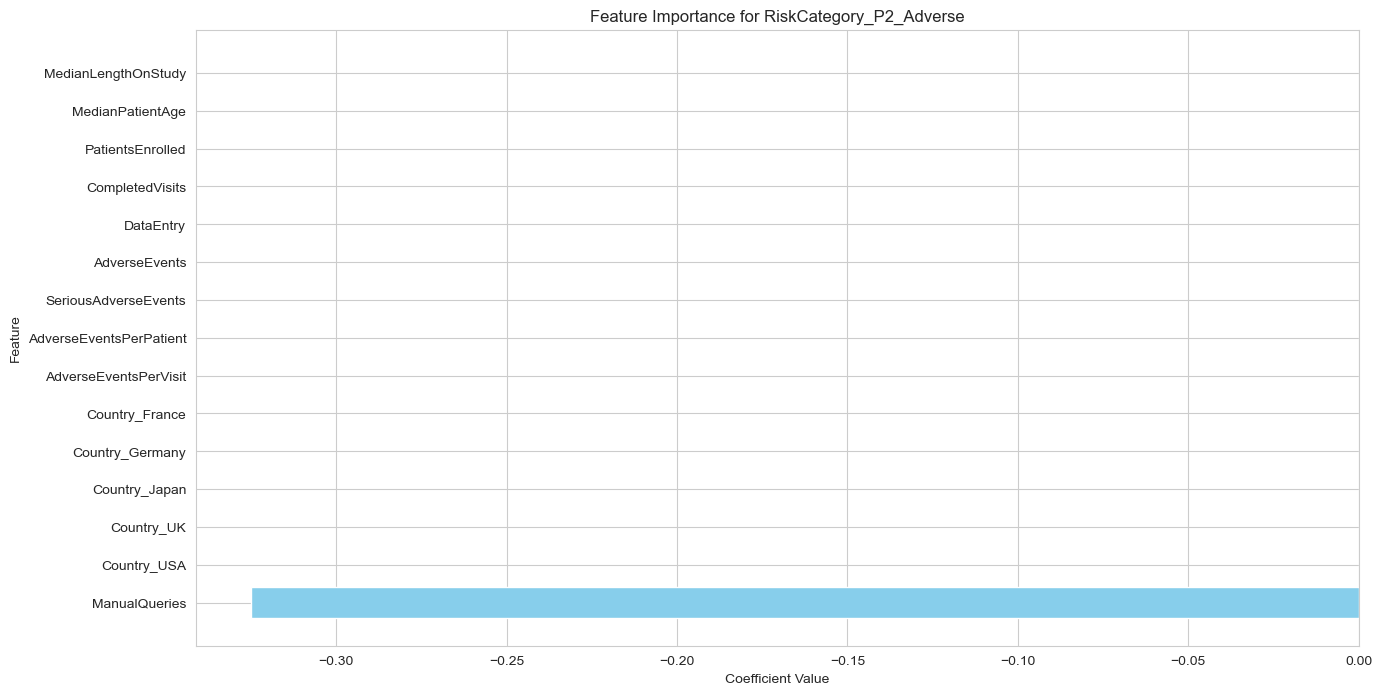

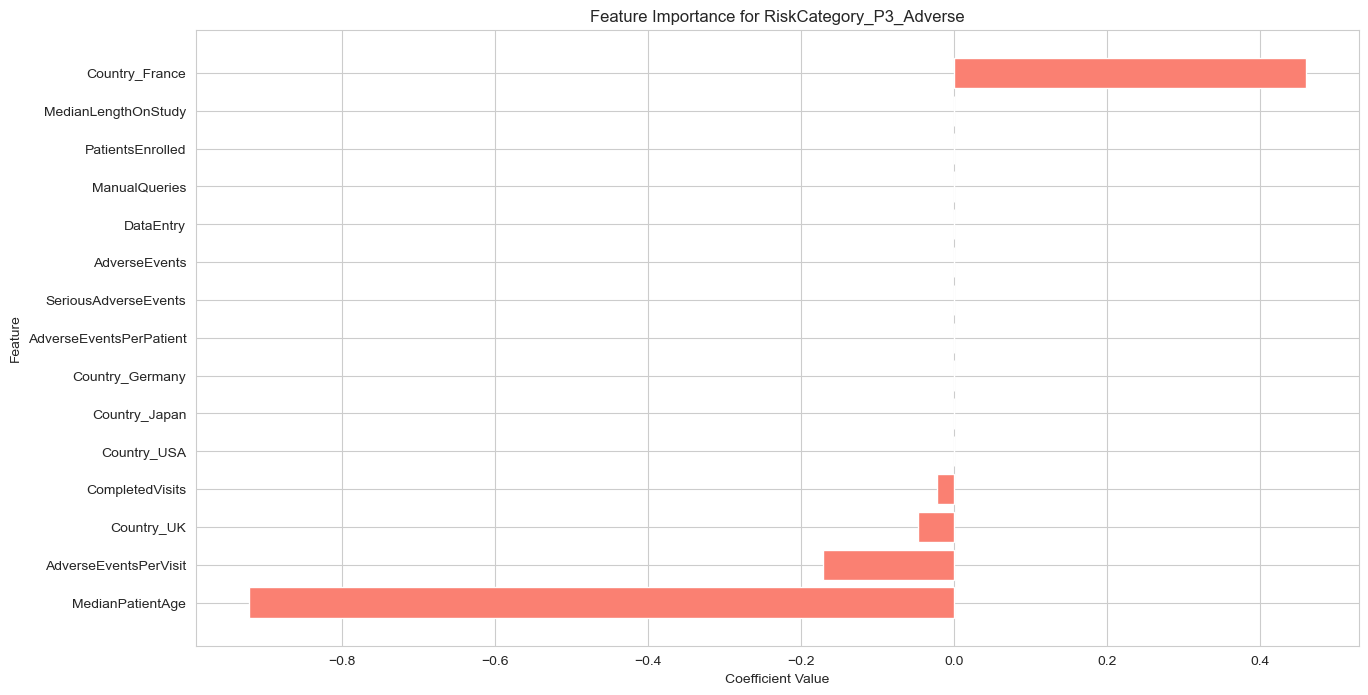

In [34]:
import matplotlib.pyplot as plt

# Extract coefficients for RiskCategory_P2_Adverse and RiskCategory_P3_Adverse
coefficients_P2 = logistic_grid_P2.best_estimator_.coef_[0]
coefficients_P3 = logistic_grid_P3.best_estimator_.coef_[0]

# Create a dataframe for visualization
features = X.columns
feature_importance_P2 = pd.DataFrame({"Feature": features, "Importance": coefficients_P2})
feature_importance_P3 = pd.DataFrame({"Feature": features, "Importance": coefficients_P3})

# Sort dataframe by importance
feature_importance_P2 = feature_importance_P2.sort_values(by="Importance", ascending=False)
feature_importance_P3 = feature_importance_P3.sort_values(by="Importance", ascending=False)

# Plot for RiskCategory_P2_Adverse
plt.figure(figsize=(15, 8))
plt.barh(feature_importance_P2["Feature"], feature_importance_P2["Importance"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance for RiskCategory_P2_Adverse")
plt.gca().invert_yaxis()
plt.show()

# Plot for RiskCategory_P3_Adverse
plt.figure(figsize=(15, 8))
plt.barh(feature_importance_P3["Feature"], feature_importance_P3["Importance"], color="salmon")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance for RiskCategory_P3_Adverse")
plt.gca().invert_yaxis()
plt.show()


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Using the best hyperparameters obtained from GridSearchCV
final_model_P2 = LogisticRegression(**best_params_P2, solver='saga', max_iter=10000)
final_model_P3 = LogisticRegression(**best_params_P3, solver='saga', max_iter=10000)

# Training the models
final_model_P2.fit(X, y_P2)
final_model_P3.fit(X, y_P3)

# Predicting on the test set
final_y_P2_pred = final_model_P2.predict(X_test_P2)
final_y_P3_pred = final_model_P3.predict(X_test_P3)

# Evaluating the final models
final_metrics_P2 = {
    'Accuracy': accuracy_score(y_test_P2, final_y_P2_pred),
    'Precision': precision_score(y_test_P2, final_y_P2_pred, average='weighted'),
    'Recall': recall_score(y_test_P2, final_y_P2_pred, average='weighted'),
    'F1-Score': f1_score(y_test_P2, final_y_P2_pred, average='weighted')
}

final_metrics_P3 = {
    'Accuracy': accuracy_score(y_test_P3, final_y_P3_pred),
    'Precision': precision_score(y_test_P3, final_y_P3_pred, average='weighted'),
    'Recall': recall_score(y_test_P3, final_y_P3_pred, average='weighted'),
    'F1-Score': f1_score(y_test_P3, final_y_P3_pred, average='weighted')
}

print(final_metrics_P2, final_metrics_P3)


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0} {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


Logistic regression showed excellent performance on the test data, suggesting they are likely to generalize well to new, unseen data. This showed that logistic regression can be used to predict  the level of risk (Red, Amber, or Green) associated with different clinical trials based on adverse events